
# Лабораторная работа №1  
## Построение модели линейной регрессии на данных по ожидаемой продолжительности жизни

**Цель работы:** исследовать зависимость ожидаемой продолжительности жизни населения от социально-экономических и медицинских показателей с помощью моделей линейной и гребневой регрессии.

В работе выполняются следующие шаги:

1. Загрузка и описание датасета *Life Expectancy Data*.
2. Первичный анализ данных (пропуски, распределения, масштабы).
3. Анализ целевой переменной и зависимостей с признаками.
4. Корреляционный анализ и отбор признаков.
5. Масштабирование признаков (стандартизация).
6. Обучение моделей линейной и гребневой регрессии.
7. Оценка качества моделей по метрикам RMSE, R² и MAPE.
8. Анализ погрешности и возможные способы повышения точности модели.


## 1. Импорт библиотек и загрузка данных

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Настройки отображения
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Загрузка датасета (файл должен находиться в той же папке, что и ноутбук)
df = pd.read_csv("Life Expectancy Data.csv")

print("Размерность датасета:", df.shape)
df.head()


Размерность датасета: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 2. Первичный анализ данных

In [2]:

# Общая информация
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:

# Описательная статистика числовых признаков
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


### 2.1. Анализ пропусков

In [4]:

missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64


Для упрощения в рамках лабораторной работы заполним пропущенные значения средними по столбцу
(для числовых признаков).


In [5]:

df = df.fillna(df.mean(numeric_only=True))
df.isna().sum().sum()


np.int64(0)

## 3. Целевая переменная и её распределение

В качестве целевой переменной используем показатель **`Life expectancy `** (ожидаемая продолжительность жизни).

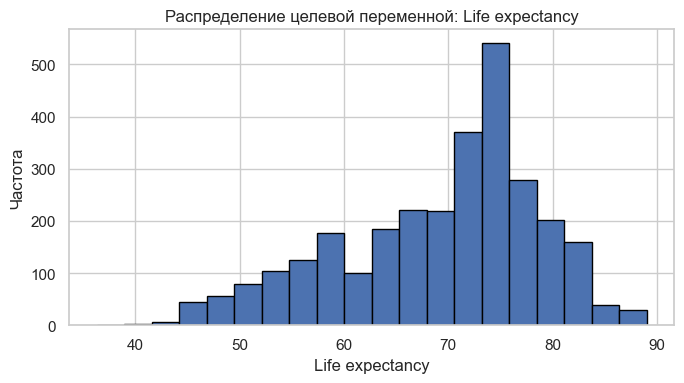

In [6]:

plt.figure(figsize=(7,4))
plt.hist(df['Life expectancy '], bins=20, edgecolor='black')
plt.title("Распределение целевой переменной: Life expectancy")
plt.xlabel("Life expectancy")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


### 3.1. Сравнение масштабов признаков

In [7]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe().T[['mean', 'std', 'min', 'max']].head(10)


,mean,std,min,max
Year,2007.518720,4.613841,2000.00,2015.00000
Life expectancy,69.224932,9.507640,36.30,89.00000
Adult Mortality,164.796448,124.080302,1.00,723.00000
infant deaths,30.303948,117.926501,0.00,1800.00000
Alcohol,4.602861,3.916288,0.01,17.87000
percentage expenditure,738.251295,1987.914858,0.00,19479.91161
Hepatitis B,80.940461,22.586855,1.00,99.00000
Measles,2419.592240,11467.272489,0.00,212183.00000
BMI,38.321247,19.927677,1.00,87.30000
under-five deaths,42.035739,160.445548,0.00,2500.00000



Из таблицы видно, что признаки измеряются в разных единицах и имеют разный порядок величин
(например, процентные показатели, смертность, доход и т.п.), поэтому **масштабирование** признаков
перед обучением модели является обязательным.


## 4. Корреляционный анализ и выбор признаков

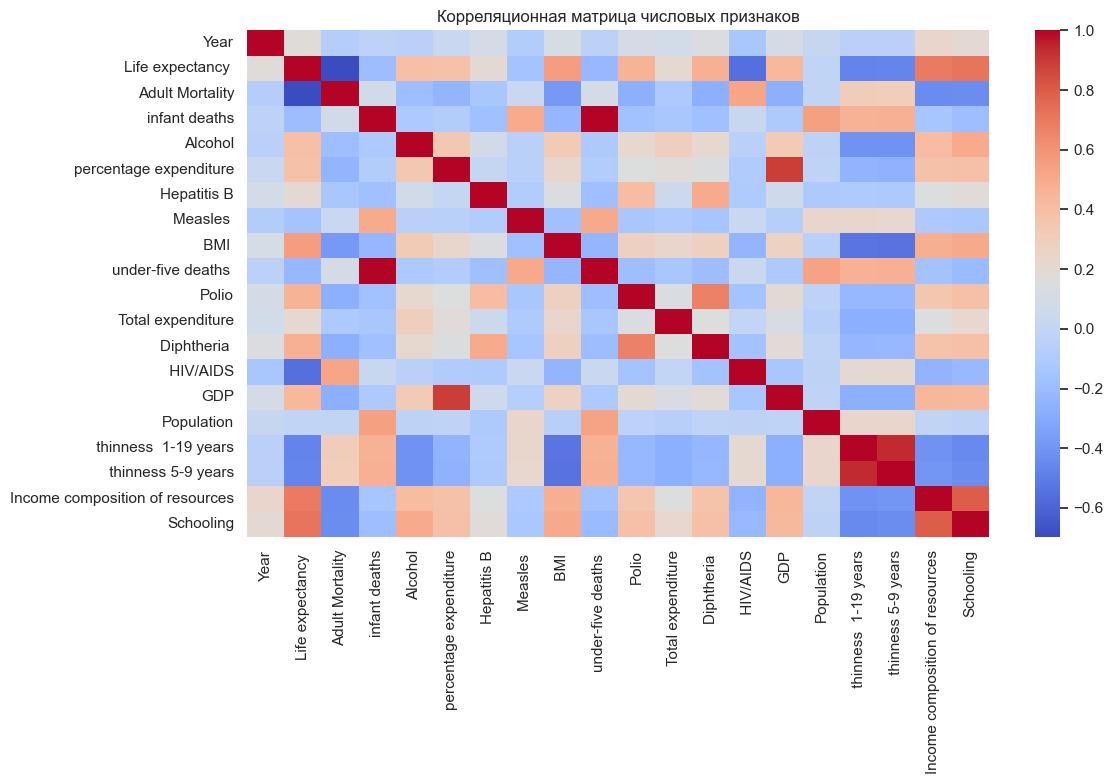

In [8]:

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()


In [9]:

target_col = 'Life expectancy '

# Отсортируем признаки по модулю корреляции с целевой переменной
corr_with_target = corr[target_col].drop(labels=[target_col]).abs().sort_values(ascending=False)
corr_with_target


Schooling                          0.715066
Adult Mortality                    0.696359
Income composition of resources    0.692483
 BMI                               0.559255
 HIV/AIDS                          0.556457
Diphtheria                         0.475418
 thinness  1-19 years              0.472162
 thinness 5-9 years                0.466629
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
under-five deaths                  0.222503
Total expenditure                  0.207981
Hepatitis B                        0.203771
infant deaths                      0.196535
Year                               0.169623
Measles                            0.157574
Population                         0.019638
Name: Life expectancy , dtype: float64


В качестве признаков для модели выберем несколько столбцов с наибольшей по модулю корреляцией 
с `Life expectancy ` (например, первые 8–10 признаков).


In [10]:

# Выберем топ-10 наиболее коррелирующих признаков
top_features = corr_with_target.head(10).index.tolist()
top_features


['Schooling',
 'Adult Mortality',
 'Income composition of resources',
 ' BMI ',
 ' HIV/AIDS',
 'Diphtheria ',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Polio',
 'GDP']

## 5. Формирование обучающей выборки и масштабирование признаков

In [11]:

X = df[top_features]
y = df[target_col]

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((2350, 10), (588, 10))

## 6. Модель линейной регрессии

In [12]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lin = linreg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)
mape_lin = mean_absolute_percentage_error(y_test, y_pred_lin)

print("Линейная регрессия:")
print(f"  RMSE = {rmse_lin:.3f}")
print(f"  R²   = {r2_lin:.3f}")
print(f"  MAPE = {mape_lin:.3f}")


Линейная регрессия:
  RMSE = 4.066
  R²   = 0.809
  MAPE = 0.046


## 7. Модель гребневой (Ridge) регрессии

In [13]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print("Ridge-регрессия (alpha = 1.0):")
print(f"  RMSE = {rmse_ridge:.3f}")
print(f"  R²   = {r2_ridge:.3f}")
print(f"  MAPE = {mape_ridge:.3f}")


Ridge-регрессия (alpha = 1.0):
  RMSE = 4.066
  R²   = 0.809
  MAPE = 0.046


## 8. Сравнение качества моделей и анализ погрешности

In [14]:

results = pd.DataFrame({
    'Модель': ['Linear', 'Ridge'],
    'RMSE': [rmse_lin, rmse_ridge],
    'R²': [r2_lin, r2_ridge],
    'MAPE': [mape_lin, mape_ridge]
})

results


,Модель,RMSE,R²,MAPE
0,Linear,4.066383,0.809137,0.045698
1,Ridge,4.066395,0.809136,0.045698



### Обсуждение результатов и причин погрешности

Полученные значения метрик показывают, насколько хорошо модели линейной и гребневой регрессии
объясняют вариацию целевой переменной **Life expectancy**. На качество модели могут влиять:

- **Нелинейность** реальных зависимостей между признаками и целевой переменной.
- **Наличие выбросов** и шумовых наблюдений в данных.
- **Мультиколлинеарность** между признаками (сильная корреляция между независимыми переменными).
- **Неучтённые факторы**, которые не представлены в датасете, но влияют на ожидаемую продолжительность жизни.
- **Погрешности измерения** и несовершенство исходных статистических данных.

### Варианты повышения точности модели

1. **Регуляризация**  
   - настройка параметра `alpha` в Ridge-регрессии;  
   - использование Lasso или ElasticNet для отбора признаков и снижения влияния мультиколлинеарности.

2. **Изменение масштаба признаков / нормализация**  
   - стандартизация уже применена;  
   - возможно использование других методов (Min-Max scaling), особенно для моделей, чувствительных к масштабу.

3. **Отбор признаков и снижение размерности**  
   - удаление слабокоррелирующих или избыточных признаков;  
   - применение PCA для снижения размерности и борьбы с мультиколлинеарностью.

4. **Использование более сложных моделей**  
   - нелинейные методы (деревья решений, Random Forest, градиентный бустинг);  
   - добавление полиномиальных признаков (PolynomialFeatures) для учёта нелинейных зависимостей.

5. **Улучшение качества данных**  
   - более аккуратная обработка пропусков;  
   - анализ и обработка выбросов;  
   - при возможности — расширение датасета за счёт дополнительных источников.
